In [109]:
import zipfile
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime
os.chdir('/Users/a.kholodov/Documents/02. Personal/20. Education/50. Universities/Springboard/Springboard_git/Springboard _repo/CS2-flights-delay-REPO')


In [84]:
def transform_data_from(zip_file, data_file, field_type=None):
    # reading the file
    with zipfile.ZipFile(zip_file) as zip_source:
        with zip_source.open(data_file) as file:
            if field_type != None:
                df = pd.read_csv(file, header = 0, 
                                usecols = field_type.keys(),
                                dtype = field_type)
            else:
                df = pd.read_csv(file, header = 0, low_memory=False)

    # Converting dates and boolean        
    if 'FlightDate' in df.columns:
        df['FlightDate'] = pd.to_datetime(df['FlightDate'])
    if 'DivReachedDest' in df.columns:
        df['DivReachedDest'] = df['DivReachedDest'].fillna(0)
    if 'Cancelled' in df.columns:
        df['Cancelled'] = df['Cancelled'].astype('bool')
    if 'Diverted' in df.columns:
        df['Diverted'] = df['Diverted'].astype('bool')
    if 'DivReachedDest' in df.columns:
        df['DivReachedDest'] = df['DivReachedDest'].astype('bool')
    return df

In [85]:
# The most important combinations of fields for analysis
Date_details = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate']
DepTime_details = ['CRSDepTime', 'DepTime']
ArrTime_details = ['CRSArrTime', 'ArrTime']
DepTime_min_details = ['CRSDepTime_min', 'DepTime_min']
ArrTime_min_details = ['CRSArrTime_min', 'ArrTime_min']
ElapsedTime_details = ['CRSElapsedTime', 'ActualElapsedTime']
CRS_details = ['CRSDepTime', 'CRSArrTime', 'CRSElapsedTime']
CRS_min_details = ['CRSDepTime_min', 'CRSArrTime_min', 'CRSElapsedTime']
Route_datails = ['Origin', 'Dest']

In [86]:
# Loading some dataset just for tests
source_zip = 'data/interim/csv_flight.zip'
source_path = 'csv_flight/report_'

flights = transform_data_from(source_zip, source_path + '2014_3.csv')

In [87]:
# Fuilter for all flights from SEA to JFK airport and back
SEA_JFK = (flights['Origin'] == 'SEA') & (flights['Dest'] == 'JFK')
JFK_SEA = (flights['Origin'] == 'JFK') & (flights['Dest'] == 'SEA')

In [88]:
flights[SEA_JFK][Date_details + CRS_details].head(10)

,Year,Month,DayofMonth,DayOfWeek,FlightDate,CRSDepTime,CRSArrTime,CRSElapsedTime
49479,2014,3,1,6,2014-03-01,715,1529,314.0
49480,2014,3,2,7,2014-03-02,715,1529,314.0
49481,2014,3,3,1,2014-03-03,715,1529,314.0
49482,2014,3,4,2,2014-03-04,715,1529,314.0
49483,2014,3,5,3,2014-03-05,715,1529,314.0
49484,2014,3,6,4,2014-03-06,715,1540,325.0
49485,2014,3,7,5,2014-03-07,715,1540,325.0
49486,2014,3,8,6,2014-03-08,715,1540,325.0
49487,2014,3,9,7,2014-03-09,715,1540,325.0
49488,2014,3,10,1,2014-03-10,715,1540,325.0


In [89]:
flights[JFK_SEA][Date_details + CRS_details].head(10)

,Year,Month,DayofMonth,DayOfWeek,FlightDate,CRSDepTime,CRSArrTime,CRSElapsedTime
49448,2014,3,1,6,2014-03-01,1845,2215,390.0
49449,2014,3,2,7,2014-03-02,1845,2215,390.0
49450,2014,3,3,1,2014-03-03,1845,2215,390.0
49451,2014,3,4,2,2014-03-04,1845,2215,390.0
49452,2014,3,5,3,2014-03-05,1845,2215,390.0
49453,2014,3,6,4,2014-03-06,1800,2115,375.0
49454,2014,3,7,5,2014-03-07,1800,2115,375.0
49455,2014,3,8,6,2014-03-08,1800,2115,375.0
49456,2014,3,9,7,2014-03-09,1800,2115,375.0
49457,2014,3,10,1,2014-03-10,1800,2115,375.0


In [90]:
# Filter for flights when CRS Arrival time is less of equal than CRS Departure time
ArrTime_less_than_DepTime = flights['CRSArrTime'] <= flights['CRSDepTime']

# Filter for flights lasting less than 60 minutes (CRS)
less_than_60_min = flights['CRSElapsedTime'] < 60

In [91]:
# Flights where CRS Arrival time less than CRS Departure time AND a flight was less than 60 min
# To evaluate is it possible to 'travel in time' - to arrive the same day earlier 
flights[ArrTime_less_than_DepTime & less_than_60_min][Date_details + CRS_details] \
    .sort_values('CRSElapsedTime').head(20)

,Year,Month,DayofMonth,DayOfWeek,FlightDate,CRSDepTime,CRSArrTime,CRSElapsedTime
342964,2014,3,8,6,2014-03-08,2350,29,39.0
342963,2014,3,7,5,2014-03-07,2350,29,39.0
342961,2014,3,6,4,2014-03-06,2350,29,39.0
211861,2014,3,1,6,2014-03-01,1815,1801,46.0
319613,2014,3,28,5,2014-03-28,1243,1230,47.0
319612,2014,3,24,1,2014-03-24,1243,1230,47.0
319611,2014,3,26,3,2014-03-26,1243,1230,47.0
319610,2014,3,31,1,2014-03-31,1243,1230,47.0
320039,2014,3,15,6,2014-03-15,1243,1230,47.0
319609,2014,3,7,5,2014-03-07,1243,1230,47.0


In [92]:
# Convert Arrival and Departure times (CRS and Actual) to minutes
flights['CRSArrTime_min'] = flights['CRSArrTime'] // 100 * 60 + flights['CRSArrTime'] % 100
flights['CRSDepTime_min'] = flights['CRSDepTime'] // 100 * 60 + flights['CRSDepTime'] % 100
flights['ArrTime_min'] = flights['ArrTime'] // 100 * 60 + flights['ArrTime'] % 100
flights['DepTime_min'] = flights['DepTime'] // 100 * 60 + flights['DepTime'] % 100

In [93]:
# Filter for flights when CRS Arrival time is less of equal than CRS Departure time
CRSArr_less_than_CRSDep_min = flights['CRSArrTime_min'] <= flights['CRSDepTime_min']

In [94]:
# FOR TIMES EXPRESSED IN MINUTES !!!
# Flights where CRS Arrival time less than CRS Departure time AND a flight was less than 60 min
# To evaluate is it possible to 'travel in time' - to arrive the same day earlier 
flights[CRSArr_less_than_CRSDep_min & less_than_60_min][Date_details + CRS_min_details] \
    .sort_values('CRSElapsedTime').head(10)

,Year,Month,DayofMonth,DayOfWeek,FlightDate,CRSDepTime_min,CRSArrTime_min,CRSElapsedTime
342964,2014,3,8,6,2014-03-08,1430,29,39.0
342963,2014,3,7,5,2014-03-07,1430,29,39.0
342961,2014,3,6,4,2014-03-06,1430,29,39.0
211861,2014,3,1,6,2014-03-01,1095,1081,46.0
319613,2014,3,28,5,2014-03-28,763,750,47.0
319612,2014,3,24,1,2014-03-24,763,750,47.0
319611,2014,3,26,3,2014-03-26,763,750,47.0
319610,2014,3,31,1,2014-03-31,763,750,47.0
320039,2014,3,15,6,2014-03-15,763,750,47.0
319609,2014,3,7,5,2014-03-07,763,750,47.0


In [95]:
# ... and the END of the table
flights[CRSArr_less_than_CRSDep_min & less_than_60_min][Date_details + CRS_min_details] \
    .sort_values('CRSElapsedTime').tail(10)

,Year,Month,DayofMonth,DayOfWeek,FlightDate,CRSDepTime_min,CRSArrTime_min,CRSElapsedTime
352929,2014,3,25,2,2014-03-25,1439,58,59.0
306177,2014,3,11,2,2014-03-11,972,971,59.0
306175,2014,3,20,4,2014-03-20,965,964,59.0
306174,2014,3,19,3,2014-03-19,965,964,59.0
306173,2014,3,17,1,2014-03-17,965,964,59.0
306171,2014,3,16,7,2014-03-16,965,964,59.0
306170,2014,3,24,1,2014-03-24,965,964,59.0
306169,2014,3,23,7,2014-03-23,965,964,59.0
306176,2014,3,21,5,2014-03-21,965,964,59.0
392396,2014,3,1,6,2014-03-01,1115,1114,59.0


In [96]:
# Calculation of the difference between departure and arrival time 
flights['CRS_Arr_minus_Dep'] = flights['CRSArrTime_min'] - flights['CRSDepTime_min'] 


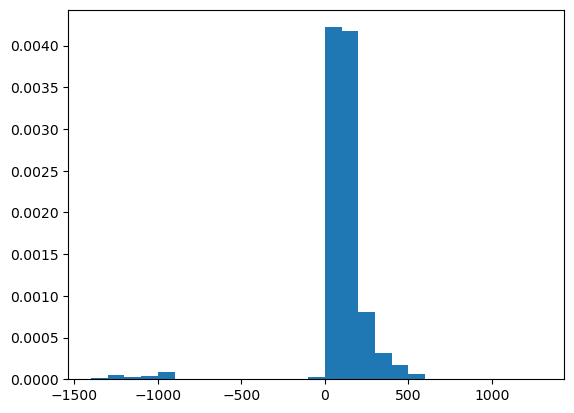

In [97]:
# Examine the difference between CRS Arrival and Departure times
bins = np.arange(-1400, 1400, 100)
plt.hist(flights['CRS_Arr_minus_Dep'], density=True,  bins = bins)
plt.show()

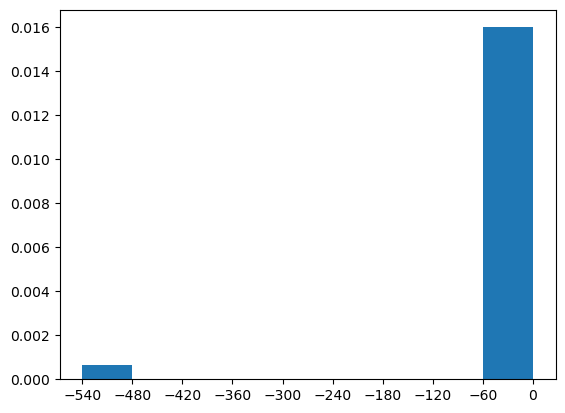

In [107]:
# Examine MORE CLOSELY the difference between CRS Arrival and Departure times 
bins = np.arange(-540, 60, 60)
plt.hist(flights['CRS_Arr_minus_Dep'], density=True,  bins = bins)
plt.xticks(bins)
plt.show()

In [98]:
# Examine the difference between CRS Arrival and Departure times
flights['CRS_Arr_minus_Dep'].describe()

count    503758.000000
mean        103.795247
std         203.069015
min       -1419.000000
25%          75.000000
50%         108.000000
75%         165.000000
max         675.000000
Name: CRS_Arr_minus_Dep, dtype: float64

In [108]:
# Are there any values between -900 and -200
diff_between_900_200 = (flights['CRS_Arr_minus_Dep'] > -480) & (flights['CRS_Arr_minus_Dep'] < -60)
flights[diff_between_900_200]

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109,CRSArrTime_min,CRSDepTime_min,ArrTime_min,DepTime_min,CRS_Arr_minus_Dep


It is possible to ‘travel in time’ only for a maximum of 60 minutes. All other differences occur when flights take off before midnight and land the next day. I can use a threshold of -60 minutes to adjust the departure date by adding one day in order to calculate the arrival date.

In [110]:
# Creating two fields:  DepDateNS - Departure date timezone naive (datetime)
#                       CRSArrDateNS - CRS Arrival date timezone naive, which is next day if the difference 
#                                   between CRS Arrival and Departure time more than 60 minutes (datetime) 
flights['DepDateNS'] = pd.to_datetime(flights['FlightDate'])
flights['CRSArrDateNS'] = [r['FlightDate'] if r['CRS_Arr_minus_Dep'] > -60 
                           else r['FlightDate'] + datetime.timedelta(days=1)
                           for ind, r in flights.iterrows()]

In [114]:
# Check
flights[CRSArr_less_than_CRSDep_min][['DepDateNS'] + 
                                    CRS_details + 
                                    CRS_min_details + 
                                    ['CRS_Arr_minus_Dep', 'CRSArrDateNS']] \
    .sort_values('CRS_Arr_minus_Dep').head(10)

,DepDateNS,CRSDepTime,CRSArrTime,CRSElapsedTime,CRSDepTime_min,CRSArrTime_min,CRSElapsedTime,CRS_Arr_minus_Dep,CRSArrDateNS
483631,2014-03-08,2359,20,81.0,1439,20,81.0,-1419,2014-03-09
404946,2014-03-07,2359,20,81.0,1439,20,81.0,-1419,2014-03-08
407415,2014-03-06,2359,20,81.0,1439,20,81.0,-1419,2014-03-07
342964,2014-03-08,2350,29,39.0,1430,29,39.0,-1401,2014-03-09
342963,2014-03-07,2350,29,39.0,1430,29,39.0,-1401,2014-03-08
342961,2014-03-06,2350,29,39.0,1430,29,39.0,-1401,2014-03-07
401976,2014-03-06,2345,32,107.0,1425,32,107.0,-1393,2014-03-07
404414,2014-03-07,2345,32,107.0,1425,32,107.0,-1393,2014-03-08
483152,2014-03-08,2345,32,107.0,1425,32,107.0,-1393,2014-03-09
344300,2014-03-25,2342,37,55.0,1422,37,55.0,-1385,2014-03-26


In [117]:
# Check
flights[CRSArr_less_than_CRSDep_min][['DepDateNS'] + 
                                    CRS_details + 
                                    CRS_min_details + 
                                    ['CRS_Arr_minus_Dep', 'CRSArrDateNS']] \
    .sort_values('CRS_Arr_minus_Dep').tail(10)

,DepDateNS,CRSDepTime,CRSArrTime,CRSElapsedTime,CRSDepTime_min,CRSArrTime_min,CRSElapsedTime,CRS_Arr_minus_Dep,CRSArrDateNS
281118,2014-03-28,1225,1225,60.0,745,745,60.0,0,2014-03-28
281117,2014-03-27,1225,1225,60.0,745,745,60.0,0,2014-03-27
281116,2014-03-26,1225,1225,60.0,745,745,60.0,0,2014-03-26
281115,2014-03-25,1225,1225,60.0,745,745,60.0,0,2014-03-25
281114,2014-03-24,1225,1225,60.0,745,745,60.0,0,2014-03-24
281113,2014-03-23,1225,1225,60.0,745,745,60.0,0,2014-03-23
281112,2014-03-22,1225,1225,60.0,745,745,60.0,0,2014-03-22
281111,2014-03-21,1225,1225,60.0,745,745,60.0,0,2014-03-21
281119,2014-03-29,1225,1225,60.0,745,745,60.0,0,2014-03-29
247107,2014-03-23,1307,1307,60.0,787,787,60.0,0,2014-03-23


In [118]:
# Check
flights[CRSArr_less_than_CRSDep_min & (flights['CRS_Arr_minus_Dep'] < 0)][['DepDateNS'] + 
                                    CRS_details + 
                                    CRS_min_details + 
                                    ['CRS_Arr_minus_Dep', 'CRSArrDateNS']] \
    .sort_values('CRS_Arr_minus_Dep').tail(10)

,DepDateNS,CRSDepTime,CRSArrTime,CRSElapsedTime,CRSDepTime_min,CRSArrTime_min,CRSElapsedTime,CRS_Arr_minus_Dep,CRSArrDateNS
306165,2014-03-28,1605,1604,59.0,965,964,59.0,-1,2014-03-28
306166,2014-03-27,1605,1604,59.0,965,964,59.0,-1,2014-03-27
306167,2014-03-25,1612,1611,59.0,972,971,59.0,-1,2014-03-25
306168,2014-03-26,1605,1604,59.0,965,964,59.0,-1,2014-03-26
225816,2014-03-01,1050,1049,59.0,650,649,59.0,-1,2014-03-01
306169,2014-03-23,1605,1604,59.0,965,964,59.0,-1,2014-03-23
306170,2014-03-24,1605,1604,59.0,965,964,59.0,-1,2014-03-24
392366,2014-03-28,2022,2021,59.0,1222,1221,59.0,-1,2014-03-28
392368,2014-03-30,2022,2021,59.0,1222,1221,59.0,-1,2014-03-30
392380,2014-03-18,2022,2021,59.0,1222,1221,59.0,-1,2014-03-18
